##**Άσκηση 2a)**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

#set device (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#define the autoencoder architecture separately in order to easily retrieve latent representations
class Autoencoder(nn.Module):
    def __init__(self, input_size, latent_size):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 32),
            nn.ReLU(),
            nn.Linear(32, 3)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_size, 32),
            nn.ReLU(),
            nn.Linear(32, 128),
            nn.ReLU(),
            nn.Linear(128, input_size),
            nn.Sigmoid()  #sigmoid activation for output to be between 0 and 1
        )

    #define forward pass as an encoding followed by decoding
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

#hyperparameters
input_size = 784 #28px x 28px = 784
latent_size = 3
batch_size = 64
learning_rate = 0.001
num_epochs = 20
torch.manual_seed(132)

#load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)

#initialize the autoencoder
model = Autoencoder(input_size, latent_size).to(device)

#define loss function and optimizer
criterion = nn.MSELoss() #MSE is the standard reconstruction-oriented loss
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

100%|██████████| 9912422/9912422 [00:00<00:00, 172766380.82it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 20611824.71it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 46107479.56it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 3631438.96it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
#training the autoencoder
for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        img = img.view(img.size(0), -1).to(device)

        #forward pass
        output = model(img)

        #compute the loss
        loss = criterion(output, img)

        #backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    #print the loss for every epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/20], Loss: 0.0408
Epoch [2/20], Loss: 0.0433
Epoch [3/20], Loss: 0.0375
Epoch [4/20], Loss: 0.0383
Epoch [5/20], Loss: 0.0352
Epoch [6/20], Loss: 0.0389
Epoch [7/20], Loss: 0.0324
Epoch [8/20], Loss: 0.0292
Epoch [9/20], Loss: 0.0316
Epoch [10/20], Loss: 0.0285
Epoch [11/20], Loss: 0.0337
Epoch [12/20], Loss: 0.0344
Epoch [13/20], Loss: 0.0344
Epoch [14/20], Loss: 0.0383
Epoch [15/20], Loss: 0.0347
Epoch [16/20], Loss: 0.0347
Epoch [17/20], Loss: 0.0285
Epoch [18/20], Loss: 0.0297
Epoch [19/20], Loss: 0.0357
Epoch [20/20], Loss: 0.0304


##**Άσκηση 2b)**

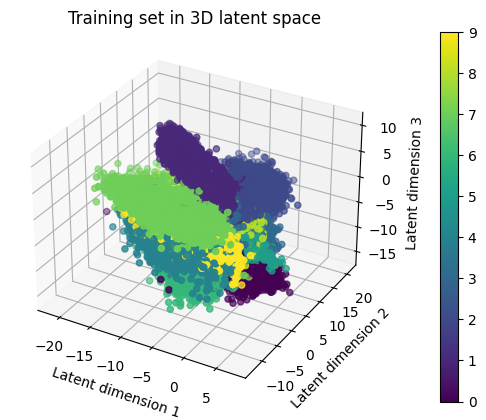

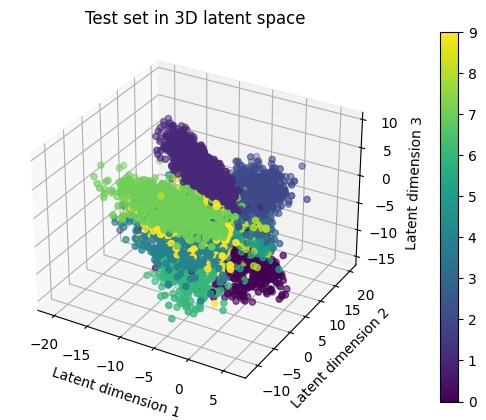

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

#encode all training set images and append them to a new array
encoded_labels = []
encoded_images = []
with torch.no_grad():
    for data in train_loader:
        img, labels = data
        img = img.view(img.size(0), -1).to(device)

        #encode the input images
        encoded_imgs = model.encoder(img)

        #append encoded images on an array
        encoded_images.append(encoded_imgs.cpu().numpy())
        encoded_labels.append(labels.numpy()) #append labels on an array

#organize encoded images on an array with shape num_of_samples x 3
encoded_images = np.concatenate(encoded_images, axis=0)

#make a column array to store all labels
encoded_labels = np.concatenate(encoded_labels, axis=0)

#visualize train set in 3D latent space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(encoded_images[:, 0], encoded_images[:, 1], encoded_images[:, 2], c=encoded_labels, cmap='viridis')
plt.subplots_adjust(right=2)
ax.set_title('Training set in 3D latent space')
ax.set_xlabel('Latent dimension 1')
ax.set_ylabel('Latent dimension 2')
ax.set_zlabel('Latent dimension 3')
fig.colorbar(scatter)
plt.show()

#load the test set
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)

#encode all test set images and their labels
encoded_labels_test = []
encoded_images_test = []
with torch.no_grad():
    for data in test_loader:
        img, labels = data
        img = img.view(img.size(0), -1).to(device)

        #encode the input images
        encoded_imgs = model.encoder(img)

        #append encoded images on an array
        encoded_images_test.append(encoded_imgs.cpu().numpy())
        encoded_labels_test.append(labels.numpy()) #append labels on an array

#organize encoded images on an array with shape num_of_samples x 3
encoded_images_test = np.concatenate(encoded_images_test, axis=0)

#make a column array to store all labels
encoded_labels_test = np.concatenate(encoded_labels_test, axis=0)

#visualize test set in 3D latent space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(encoded_images_test[:, 0], encoded_images_test[:, 1], encoded_images_test[:, 2], c=encoded_labels_test, cmap='viridis')
plt.subplots_adjust(right=2)
ax.set_title('Test set in 3D latent space')
ax.set_xlabel('Latent dimension 1')
ax.set_ylabel('Latent dimension 2')
ax.set_zlabel('Latent dimension 3')
fig.colorbar(scatter)
plt.show()

##**Άσκηση 2c)**

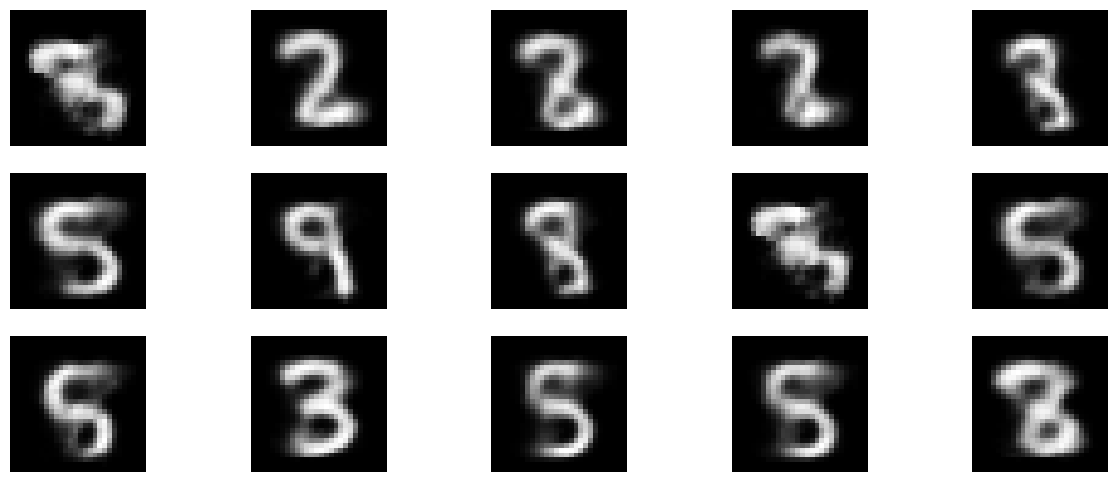

In [ ]:
#generate images from random points in the latent space using decoder
num_generated_images = 15
latent_samples = torch.randn(num_generated_images, latent_size).to(device)
generated_images = model.decoder(latent_samples)

#reshape the generated images to match the original input size (28x28)
generated_images = generated_images.view(-1, 1, 28, 28)

#plot the generated images
plt.figure(figsize=(15, 6))
for i in range(num_generated_images):
    plt.subplot(3, 5, i + 1)
    plt.imshow(generated_images[i].cpu().detach().numpy().squeeze(), cmap='gray')
    plt.axis('off')
plt.show()